# Python for Linguists module 1.4

Welcome to module 1.4. In this module, we will start calculating statistics using real corpus. 

Let's first refresh your memory on ngrams and probabilities by completing the following quiz:

## Pre-module quiz

Given the sequence 'aabbdab', what is *P*(b|a)?

A. 1/2

B. 1/3

C. 2/3

D. 0

## Importing packages

In python, there are many pre-built packages that contain modules (python scripts) that can be installed and imported easily. Once imported, we can use the functions defined in the imported modules, so that we do not need to write them yourselves. 

In this tutorial, we have already installed a package named spacy. Let's try importing a class named English from the spacy package, and create a default tokenizer from it. 

The English class is in a script named 'en.py' in the path spacy/lang/. To import the class variable, we could do the following:

In [9]:
import spacy.lang.en #import the path
nlp=spacy.lang.en.English() #call the class variable with full path

In [10]:
import spacy.lang.en as en #import the path and give it a name
nlp=en.English() #call the class variable with the name

In [12]:
from spacy.lang.en import English # directly import the class variable
nlp=English() # call the class directly

Now let's initialize a default English tokenizer

In [15]:
tokenizer = nlp.Defaults.create_tokenizer(nlp)

## Processing the corpora

We will be using the the full works of Shakespeare corpus. The relative path to the corpus file is ../../corpora/shakespeare (.. indicates the parent directory). 
Let's first load the corpus by using the open function:

In [17]:
f=open('../../corpora/Shakespeare','r')

We declared the variable f to open the Shakespeare file. open() takes 2 arguments, the path to the file that we want to open and a string that represents the kinds of permission or operation we want to do on the file. Here 'r' refers to the permission of 'read-only'. 

Remember to close the f variable after finishing reading:


In [19]:
f.close()

A more recommendable way is to use with keyword so that the file will be properly closed after its suite finishes

In [119]:
with open('../../corpora/Shakespeare','r') as f:
    print ('test')

test


Let's write a for loop to process each line of the file and store the processed lines as tokenized word lists into another variable

In [123]:
f_processed=[] # a list to store the processed lines
with open('../../corpora/Shakespeare','r') as f:
    for line in f:
        #for each line, we do:
        #1. remove control characters like \t \r \n
        line=line.strip()
        #2. skip the empty lines
        if line=='':
            continue
        else: 
            #3. tokenize the sentence into word list:
            tokens=tokenizer(line) #the tokenizer() function that we imported return a series of token items which are now Spacy classes
            # To convert each item in tokens to strings, we need to loop over the line again and convert each token to strings by calling str()
            tokens_str=[]
            for tok in tokens:
                tokens_str.append(str(tok))# str() converts into a string
            f_processed.append(tokens_str)

We can wrap up the above into a function to process files

In [150]:
def process(filename):
    '''
    process file into a list of lines where each line is a list of words

    Parameters
    ----------
    filename : file path

    Returns
    -------
    a list of list of strings
    [
        [1609]
        [THE, SONNETS]
        ...
    ]
    '''
    f_processed=[] # a list to store the processed lines
    with open(filename,'r') as f:
        for line in f:
            #for each line, we do:
            #1. remove control characters like \t \r \n
            line=line.strip()
            #2. skip the empty lines
            if line=='':
                continue
            else: 
                #3. tokenize the sentence into word list:
                tokens=tokenizer(line) #the tokenizer() function that we imported return a series of token items which are now Spacy classes
                # To convert each item in tokens to strings, we need to loop over the line again and convert each token to strings by calling str()
                tokens_str=[]
                for tok in tokens:
                    tokens_str.append(str(tok))# str() converts into a string
                f_processed.append(tokens_str)
    return f_processed

Call the function:

In [122]:
f_processed=process('../../corpora/Shakespeare')

You can check how many lines the corpus contains by calling len() function over f_processed. 

In [189]:
len(f_processed)

114422

### Practice quiz 1:
In the following cell, please try processing the other corpus 'Marlowe' in the same directory of 'Shakespeare', and store the processed results in variable: marlowe_processed. 

Then, Answer the following question:

How many lines does Marlowe corpus contain?

A. 19492

B. 114422

C. 1949

D. 45336

You can insert your code below: 

In [160]:
marlowe_processed=process('../../corpora/Marlowe')

In [190]:
len(marlowe_processed)

19492

## Dictionary

A dictionary is a collection which is unordered, changeable and indexed. 
In Python dictionaries are written with curly brackets, and they have keys and values.
For example:

In [8]:
thisdict =	{
  "brand": "Ford",
  "model": "Mustang",
  "year": 1964
}

You can access the items of a dictionary by referring to its key name, inside square brackets:

In [10]:
thisdict['brand']

'Ford'

You can change the value of a specific item by referring to its key name:

In [9]:
thisdict['year']=2019

1964

Adding an item to the dictionary is done by using a new index key and assigning a value to it:

In [12]:
thisdict["color"] = "red"

You can loop through a dictionary by using a for loop

In [13]:
#Print all key names in the dictionary, one by one:

for x in thisdict:
  print(x)

brand
model
year
color


In [14]:
#Print all values in the dictionary, one by one:

for x in thisdict:
  print(thisdict[x])

Ford
Mustang
1964
red


In [15]:
#You can also use the values() function to return values of a dictionary:

for x in thisdict.values():
  print(x)

Ford
Mustang
1964
red


In [16]:
#Loop through both keys and values, by using the items() function:
for x, y in thisdict.items():
  print(x, y)

brand Ford
model Mustang
year 1964
color red


To determine if a specified key is present in a dictionary use the 'in' keyword:

In [17]:
if "model" in thisdict:
  print("Yes, 'model' is one of the keys in the thisdict dictionary")

Yes, 'model' is one of the keys in the thisdict dictionary


To determine how many items (key-value pairs) a dictionary has, use the len() method.

In [21]:
#Print the number of items in the dictionary:
print(len(thisdict))

4


## Counting Vocabulary

Now let's loop over the word lists in f_processed to create a vocabulary dictionary:

In [44]:
vocab={}# create an empty vocabulary dictionary to store words as keys and counts as values later. 
for line in f_processed:
    for word in line:
        if word in vocab:
            vocab[word]+=1 # update the count for an existing word
        else:
            vocab[word]=1 # initilize the count for a new word


Again, we can wrap the above into a function

In [45]:
def create_vocab_dict(f_processed_arg):
    '''
    Collect vocabulary counts from text

    Parameters
    ----------
    f_processed_arg: a list of list of words processed from text as the output of process()

    Returns
    -------
    a dictionary with words (str) as keys and counts(int) as values
    vocab={
    'SONNETS': 1
    }
    '''
    vocab={}# create an empty vocabulary dictionary to store words as keys and counts as values later. 
    for line in f_processed_arg:
        for word in line:
            if word in vocab:
                vocab[word]+=1 # update the count for an existing word
            else:
                vocab[word]=1 # initilize the count for a new word
    return vocab

We can call the function:

In [46]:
vocab=create_vocab_dict(f_processed)

We can then retrieve the count of a specific word by vocab[word], eg.

In [94]:
vocab['thee']

3144

### Practice quiz 2:
Use the following cell to retrieve the counts of the following pronouns in Shakespeare: 'thou','thee','thy','thine','you','your'. Which order of the word counts is correct?

A. 'you'>'thou'>'your'>'thy'>'thee'>'thine'

B. 'you'>'your'>'thou'>'thy'>'thee'>'thine'

C. 'thou'>'you'>'thy'>'thine'>'your'>'thee'

D. 'you'>'thou'>'your'>'thy'>'thee'>'thine'

You can insert your code here:

In [202]:
vocab['thou']

4556

### Practice quiz 3:
please collect a vocabulary dictionary from 'Marlowe' as well in the following cells, and answer the same question:

Which order of the word counts is correct in Marlowe?

A. 'you'>'thou'>'your'>'thy'>'thee'>'thine'

B. 'you'>'your'>'thou'>'thy'>'thee'>'thine'

C. 'thou'>'you'>'thy'>'thine'>'your'>'thee'

D. 'you'>'thou'>'your'>'thy'>'thee'>'thine'

You can insert your code here:

In [203]:
vocab_marlowe=create_vocab_dict(marlowe_processed)

In [209]:
vocab_marlowe['thine']

64

## Caluating Type-token ratio

Let's calculate type count first:

In [116]:
#Recall that vocab stores words as keys. Let's first retrieve the key list of the vocab dictioanry:
key_list=vocab.keys()
# the number of types is just the length of the key list
type_count=len(vocab.keys())
print (type_count)

32951


Let's caculate token count:

In [75]:
# Let's create a loop to aggregate the token counts in the vocabulary:
token_count=0
for word in vocab:
    token_count+=vocab[word]
print (token_count)


1133110


In [77]:
#Let's calculate the type-token ratio:
ttr=type_count/token_count
print (ttr)

0.029080142263328362


Alternatively, we could wrap the calculation up into a function that takes in vocab dictionary and outputs the ttr

In [117]:
def ttr_cal(vocab_arg):
    '''
    calculate type-token ratio
    
    Parameters
    ----------
    vocab_arg: a vocab dictionary with words as keys and counts as values

    Returns
    -------
    a float number indicating type-token ratio
    '''
    type_count=len(vocab_arg.keys())
    token_count=0
    for word in vocab_arg:
        token_count+=vocab_arg[word]
    ttr=type_count/token_count
    return ttr

In [118]:
print (ttr_cal(vocab))

0.029080142263328362


### Practice quiz 4:
What does type-token ratio tell us about a corpus. Eg. lexical variation? 

Use the above functions to calculate the type-token ratio of Marlowe corpus and compare the results with the Shakespeare corpus. Who has more lexical variation?

You can write your code below:

In [211]:
vocab_marlowe=create_vocab_dict(marlowe_processed)
ttr_cal(vocab_marlowe)

0.04902041788375269

## Plotting a frequency distribution

Let's first import matplotlib for plotting

In [213]:
import matplotlib.pyplot as plt

Then we can sort the words to get the top 100 frequent words. You can change rank_start and rank_end to retrieve ranks that you want to show. 

In [278]:
rank_start=0
rank_end=100
vocab_sorted=sorted(vocab.items(),key=lambda x: x[1],reverse=True)[rank_start:rank_end] #sorting. returns sorted pairs of (word,count). Please don't worry if you can't understand this part


loop through the sorted vocabulary to get words and counts for plotting the graphs


In [279]:
words=[]
counts=[]
for w_c in vocab_sorted:
    w=w_c[0]
    words.append(w)
    count=w_c[1]
    counts.append(count)


We could now plot a histogram using the words and counts

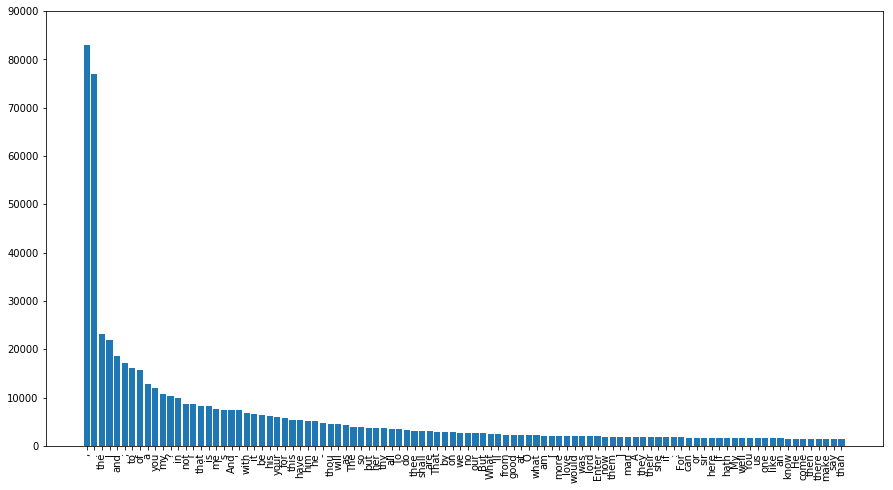

In [280]:


plt.figure(figsize=(15,8)) #figure size
plt.bar(words,counts) #plot the historgram
plt.ylim(0,90000)
plt.xticks(rotation=90) # rotate the x label
plt.show()


### Practice quiz 5:
Try changing rank_start and rank_end and observe what kind of words the top-frequent words are? What about the low-frequent words?  How many top-frequent words do we have? How many low-frequent words do we have?


## Counting bigrams

A bigram is a sequence of adjacent two words. Let's create a nested dictionary to store the bigrams. The key will be each bigram and the value will be counts


Let's first loop through the lines in f_processed

In [273]:
bigram_dict={}
for line in f_processed:
    #insert start <start> and end <end> token
    line=['<start>']+line+['<end>']
    for i,w in enumerate(line):
        w_first=w
        if i+1<len(line): #not the end of the line
            w_second=line[i+1]
            bigram=(w_first,w_second) #a tuple to represent bigram
            if bigram not in bigram_dict:
                bigram_dict[bigram]=1
            else:
                bigram_dict[bigram]+=1
                
        

### Practice quiz 6:
Is gender associated with beauty? Try retrieving the count of 'his beauty' and 'her beauty'? Which has more counts?